In [1]:
%pylab inline
import biff
from octopus import *
from pygadgetreader import *
from weinberg_method import *

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

## How well can the SCF method reproduce a triaxial halo?

1. Compute the Snlm, Tnlm coefficients for oblate and prolate halos.
2. Try to determine 

In [3]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

In [4]:
def truncate(pos):
    index_cut = np.where(np.sqrt(pos[:,0]**2.0+pos[:,1]**2.0+pos[:,2]**2.0)<500)[0]
    return pos[index_cut]

In [5]:
MW_sph = readsnap('../../data/MW_models/triaxial/spherical_010', 'pos', 'dm')
MW_oblate12 = readsnap('../../data/MW_models/triaxial/Oblate12_010', 'pos', 'dm')
MW_oblate15 = readsnap('../../data/MW_models/triaxial/Oblate15_010', 'pos', 'dm')
MW_prolate06 = readsnap('../../data/MW_models/triaxial/Prolate06_010', 'pos', 'dm')
MW_prolate08 = readsnap('../../data/MW_models/triaxial/Prolate08_010', 'pos', 'dm')

In [6]:
MW_sph_t = truncate(MW_sph)
MW_oblate12_t = truncate(MW_oblate12)
MW_oblate15_t = truncate(MW_oblate15)
MW_prolate08_t = truncate(MW_prolate08)
MW_prolate06_t = truncate(MW_prolate06)


r_s = 40.85

In [7]:
Mass = np.ones(len(MW_oblate12_t))


In [37]:
Sspheric, Tspheric, nlmsph = STnlm(MW_sph_t, Mass, r_s, 20, 0)
Soblate12, Toblate12, nlmso12 = STnlm(MW_oblate12_t, Mass, r_s, 20, 0)
Soblate15, Toblate15, nlmso15 = STnlm(MW_oblate15_t, Mass, r_s, 20, 0)
Sprolate06, Tprolate06, nlmsp06 = STnlm(MW_prolate06_t, Mass, r_s, 20, 0)
Sprolate08, Tprolate08, nlmsp08 = STnlm(MW_prolate08_t, Mass, r_s, 20, 0)


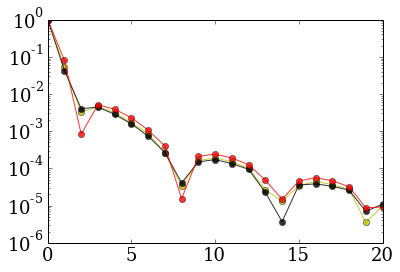

In [9]:
plt.semilogy(np.array(nlmsph)[:,0], np.abs(Ssph.flat/Ssph[0,0,0])[:], marker='o', c='y', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmso12)[:,0], np.abs(Soblate12.flat/Soblate12[0,0,0])[:], marker='o', c='k', alpha=0.8, label='$n=20$')
#plt.semilogy(np.array(nlmso15)[:,0], np.abs(Soblate15.flat/Soblate15[0,0,0])[:], marker='o', c='b', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmsp06)[:,0], np.abs(Sprolate06.flat/Sprolate06[0,0,0])[:], marker='o', c='r', alpha=0.8, label='$n=20$')
#plt.semilogy(np.array(nlmsp08)[:,0], np.abs(Sprolate08.flat/Sprolate08[0,0,0])[:], marker='o', c='g', alpha=0.8, label='$n=20$')

In [36]:
Sspheric_l, Tsph_l, nlmsph_l = STnlm(MW_sph_t, Mass, r_s, 20, 1)

In [11]:
Soblate12_l, Toblate12_l, nlmso12_l = STnlm(MW_oblate12_t, Mass, r_s, 20,1)

In [12]:
#Soblate15_l, Toblate15_l, nlmso15_l = STnlm(MW_oblate15_t, Mass, r_s, 10, 10)


In [13]:
Sprolate06_l, Tprolate06_l, nlmsp06_l = STnlm(MW_prolate06_t, Mass, r_s, 20, 1)
#Sprolate08_l, Tprolate08_l, nlmsp08_l = STnlm(MW_prolate08_t, Mass, r_s, 10, 10)

In [92]:
print Ssph_l[:,1,1]

[ -4.75640258e+00  -1.84939928e-01  -2.14944250e-01   2.58163513e-01
  -1.01635434e-01  -3.30560790e-02   1.39542644e-02   9.23184204e-03
   2.69359664e-03  -8.67006004e-03   6.39008549e-03]


In [38]:
Ssph = Ssph.flatten()
Sob12 = Soblate12.flatten()
Sob15 = Soblate15.flatten()

Spr06 = Sprolate06.flatten()
Spr08 = Sprolate08.flatten()

Ssph_l = Sspheric_l.flatten()
Sob12_l = Soblate12_l.flatten()
Spr06_l = Sprolate06_l.flatten()

#Ssph_all = Ssph_l.flatten()
#Sob12_all = Soblate12_l.flatten()
#Spr06_all = Sprolate06_l.flatten()



In [45]:
print Sspheric_l[:,1,1]

[ -4.75640258e+00  -1.84939928e-01  -2.14944250e-01   2.58163513e-01
  -1.01635434e-01  -3.30560790e-02   1.39542644e-02   9.23184204e-03
   2.69359664e-03  -8.67006004e-03   6.39008549e-03   2.75778388e-03
   1.00998860e-03  -6.74278880e-03   3.45212489e-03  -1.39333364e-03
  -4.95081418e-04   6.68012417e-04  -2.57481758e-04   1.17825729e-03
  -2.25787079e-04]


In [39]:
b_sph = smooth_b(Ssph)
b_ob12 = smooth_b(Sob12)
b_ob15 = smooth_b(Sob15)
b_pr06 = smooth_b(Spr06)
b_pr08 = smooth_b(Spr08)

b_sph_l = smooth_b(Ssph_l)
b_ob12_l = smooth_b(Sob12_l)
b_pr06_l = smooth_b(Spr06_l)


print len(b_sph)


21


weinberg_method.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  b[i] = 1.0/(1.0 + np.var(a[:i+1])/a[i]**2)


In [44]:
print b_sph_l, Ssph_l

[  1.00000000e+00   0.00000000e+00   4.94999361e-06   7.65183381e-06
   1.67247740e-02   0.00000000e+00   4.30199907e-07   2.00914430e-08
   1.06883425e-04   0.00000000e+00   2.82805795e-07   3.86343203e-08
   3.01033557e-04   0.00000000e+00   8.59562415e-08   7.24491090e-08
   1.77971401e-04   0.00000000e+00   1.90357794e-11   1.38302467e-08
   6.23126340e-05   0.00000000e+00   4.72917819e-09   1.73883719e-09
   1.92265460e-05   0.00000000e+00   3.73952868e-11   3.59083438e-10
   2.11951662e-06   0.00000000e+00   1.77759023e-10   1.78726575e-10
   3.74700126e-08   0.00000000e+00   5.24498238e-10   1.70515740e-11
   1.02483998e-06   0.00000000e+00   1.12929273e-11   1.95693327e-10
   1.52304837e-06   0.00000000e+00   2.60069438e-11   1.16642636e-10
   1.05593974e-06   0.00000000e+00   9.31763928e-12   2.36512385e-11
   5.15675893e-07   0.00000000e+00   9.54216455e-11   3.43058542e-12
   3.79828591e-08   0.00000000e+00   4.32566399e-11   1.64417216e-10
   1.00667121e-08   0.00000000e+00

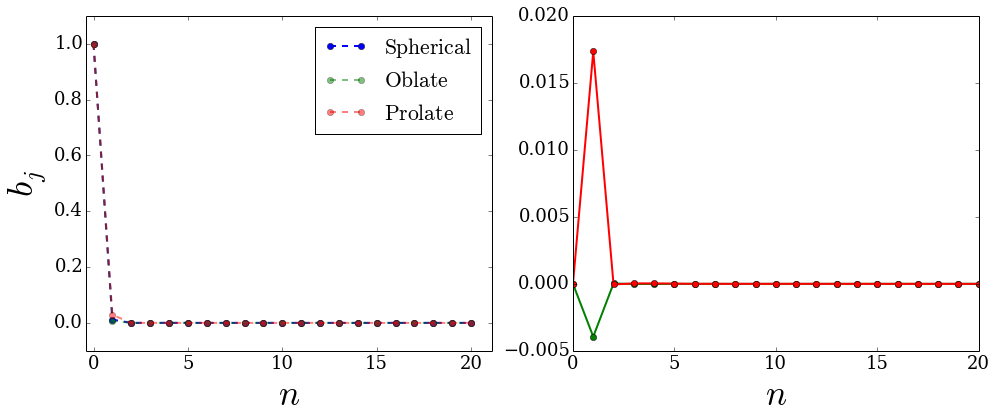

In [48]:
figure(figsize=(16, 6))
subplot(1, 2, 1)

plot(b_sph, ls='--', lw=2, marker='o', label='$\mathrm{Spherical}$')
plot(b_ob12, ls='--', lw=2, marker='o', label='$\mathrm{Oblate}$', alpha=0.5)
plot(b_pr06, ls='--', lw=2, marker='o', label='$\mathrm{Prolate}$', alpha=0.5)
ylabel('$b_j$', fontsize=35)
xlabel('$n$', fontsize=35)

legend(loc='best')

ylim(-0.1, 1.1)
xlim(-0.4, 21.1)

subplot(1, 2, 2)
plot((b_ob12-b_sph), ls='-', lw=2, marker='o', c='g')
plot((b_pr06-b_sph), ls='-', lw=2, marker='o', c='r')
xlabel('$n$', fontsize=35)


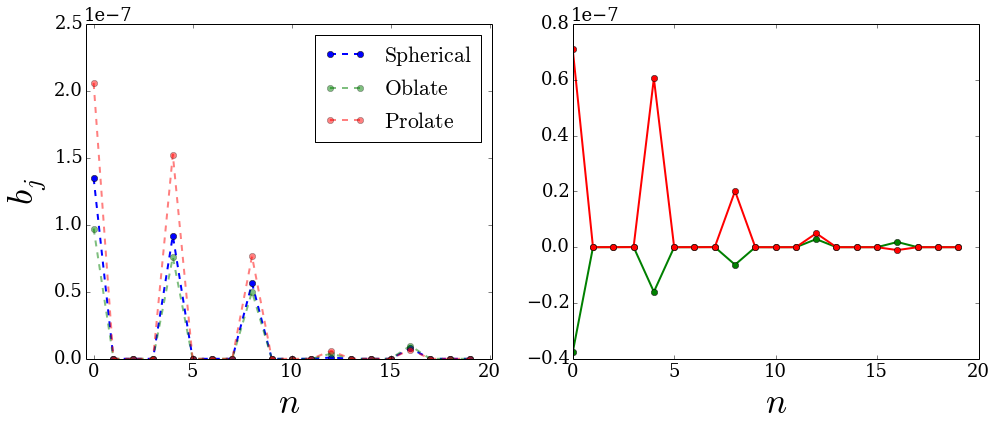

In [51]:
figure(figsize=(16, 6))
subplot(1, 2, 1)

plot(b_sph_l[-20:], ls='--', lw=2, marker='o', label='$\mathrm{Spherical}$')
plot(b_ob12_l[-20:], ls='--', lw=2, marker='o', label='$\mathrm{Oblate}$', alpha=0.5)
plot(b_pr06_l[-20:], ls='--', lw=2, marker='o', label='$\mathrm{Prolate}$', alpha=0.5)
ylabel('$b_j$', fontsize=35)
xlabel('$n$', fontsize=35)

legend(loc='best')

#ylim(-0.1, 1.1)
xlim(-0.4, 20.1)

subplot(1, 2, 2)
plot((b_ob12_l[-20:]-b_sph_l[-20:]), ls='-', lw=2, marker='o', c='g')
plot((b_pr06_l[-20:]-b_sph_l[-20:]), ls='-', lw=2, marker='o', c='r')
xlabel('$n$', fontsize=35)


In [52]:
D_sph_l = MISE(Ssph_l)
D_ob12_l = MISE(Sob12_l)
D_pr06_l = MISE(Spr06_l)

D_sph = MISE(Ssph)
D_ob12 = MISE(Sob12)
D_pr06 = MISE(Spr06)

In [53]:
Spr06[:1]

array([ 3512.72214825])

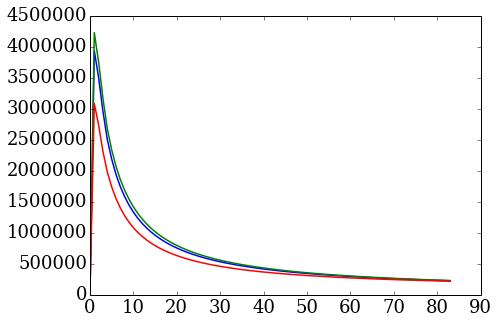

In [54]:
figure(figsize=(7, 5))
#plot(D_sph, lw=1.5)
#plot(D_ob12, lw=1.5)
#plot(D_pr06, lw=1.5)

plot(D_sph_l, lw=1.5)
plot(D_ob12_l, lw=1.5)
plot(D_pr06_l, lw=1.5)

#xlim(0, 200)
#ylim(0, 5000000000)

<matplotlib.colorbar.Colorbar instance at 0x7f7176ce6e60>

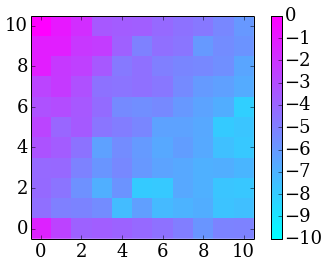

In [36]:
imshow(np.log10(np.abs(Ssph_l[:,:,0]).T / np.nanmax(Ssph_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-10, vmax=0)

colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f71762448c0>

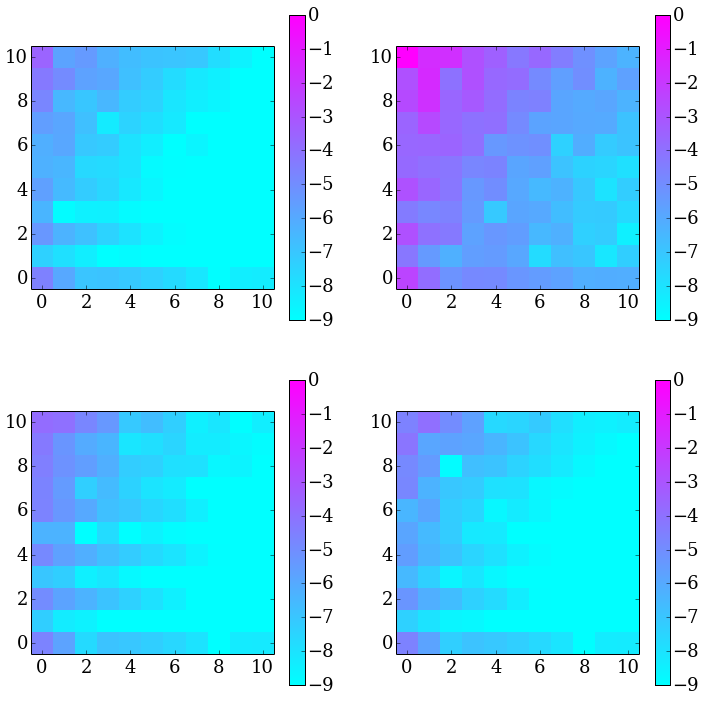

In [37]:
figure(figsize=(12,12))
subplot(2, 2, 1)
imshow(np.log10(np.abs(Soblate12_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()

subplot(2, 2, 2)
imshow(np.log10(np.abs(Soblate15_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()


subplot(2, 2, 3)
imshow(np.log10(np.abs(Sprolate06_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()


subplot(2, 2, 4)
imshow(np.log10(np.abs(Sprolate08_l[:,:,0]).T / np.nanmax(Soblate15_l[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.cool, vmin=-9, vmax=0)
colorbar()



In [28]:
## Potentials 

Oblate_12_pos = readsnap('../data/MW_models/triaxial/Oblate12_002.hdf5', 'pos', 'dm')
Oblate_12_pot = readsnap('../data/MW_models/triaxial/Oblate12_002.hdf5', 'pot', 'dm')

Oblate_15_pos = readsnap('../data/MW_models/triaxial/Oblate15_002.hdf5', 'pos', 'dm')
Oblate_15_pot = readsnap('../data/MW_models/triaxial/Oblate15_002.hdf5', 'pot', 'dm')

Prolate_08_pos = readsnap('../data/MW_models/triaxial/Prolate08_002.hdf5', 'pos', 'dm')
Prolate_08_pot = readsnap('../data/MW_models/triaxial/Prolate08_002.hdf5', 'pot', 'dm')

Prolate_06_pos = readsnap('../data/MW_models/triaxial/Prolate06_002.hdf5', 'pos', 'dm')
Prolate_06_pot = readsnap('../data/MW_models/triaxial/Prolate06_002.hdf5', 'pot', 'dm')


(-500, 500)

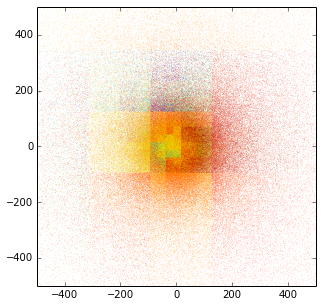

In [12]:
figure(figsize=(5,5))
scatter(Oblate_12_pos[:,0], Oblate_12_pos[:,1], c=np.log10(np.abs(Oblate_15_pot)), edgecolor='none', s=0.1)
xlim(-500,500)
ylim(-500,500)
#colorbar()

In [13]:
def pot_contour(x, y, pot, n_bins):
    x_pot = np.linspace(min(x), max(x), n_bins)
    y_pot = np.linspace(min(y), max(y), n_bins)
    pot_grid = np.zeros((n_bins,  n_bins))

    for i in range(1,n_bins):
        for j in range(1,n_bins):
            index = np.where((x<x_pot[i]) & (x>x_pot[i-1]) & (y<y_pot[j]) & (y>y_pot[j-1]))[0]
            pot_grid[i][j] = np.mean(pot[index])
    return x_pot, y_pot, pot_grid

In [17]:
def trunc(xyz, pot):
    index_cut = np.where(np.sqrt(xyz[:,0]**2.0 + xyz[:,1]**2.0 + xyz[:,2]**2.0) <600)[0]
    return xyz[index_cut], pot[index_cut]

In [29]:
oblate12_t, oblate12_t_pot = trunc(Oblate_12_pos, Oblate_12_pot)
oblate15_t, oblate15_t_pot = trunc(Oblate_15_pos, Oblate_15_pot)

prolate08_t, prolate08_t_pot = trunc(Prolate_08_pos, Prolate_08_pot)
prolate06_t, prolate06_t_pot = trunc(Prolate_06_pos, Prolate_06_pot)

In [45]:
x_prol06, y_prol06, pot_prol06 = pot_contour(prolate06_t[:,0], prolate06_t[:,1], (np.abs(prolate06_t_pot)), 200)
x_prol08, y_prol08, pot_prol08 = pot_contour(prolate08_t[:,0], prolate08_t[:,1], (np.abs(prolate08_t_pot)), 200)

x_obl12, y_obl12, pot_obl12 = pot_contour(oblate12_t[:,0], oblate12_t[:,1], (np.abs(oblate12_t_pot)), 200)
x_obl15, y_obl15, pot_obl15 = pot_contour(oblate15_t[:,0], oblate15_t[:,1], (np.abs(oblate15_t_pot)), 200)

In [43]:
levels1 = np.linspace(np.nanmin(pot_obl12), np.nanmax(pot_obl12), 10)
levels2 = np.linspace(np.nanmin(pot_obl15), np.nanmax(pot_obl15), 10)
levels3 = np.linspace(np.nanmin(pot_prol08), np.nanmax(pot_prol08), 10)
levels4 = np.linspace(np.nanmin(pot_prol06), np.nanmax(pot_prol06), 10)

<matplotlib.contour.QuadContourSet instance at 0x7f35563fe128>

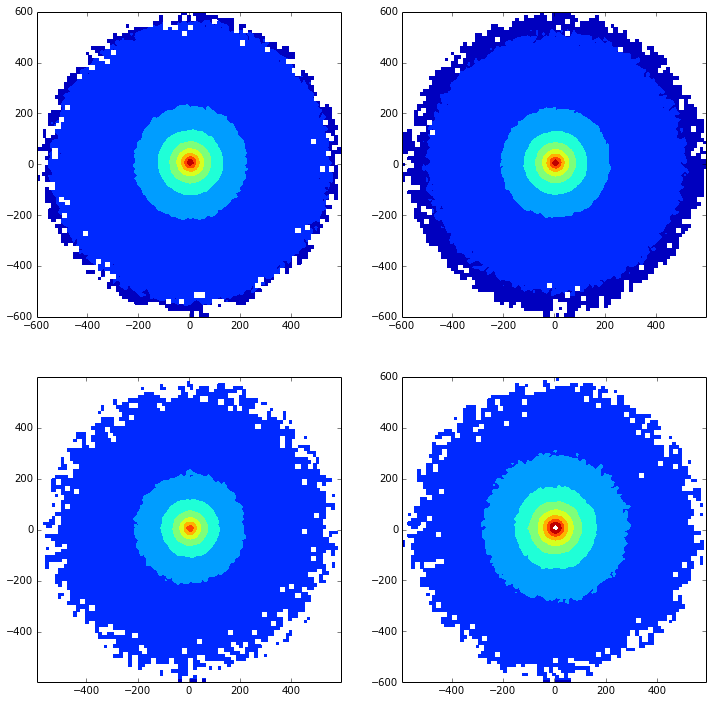

In [44]:
figure(figsize=(12,12))
subplot(2, 2, 1)
contourf(x_obl12, y_obl12, pot_obl12, levels=levels1)

subplot(2, 2, 2)
contourf(x_obl15, y_obl15, pot_obl15, levels=levels2)

subplot(2, 2, 3)
contourf(x_prol06, y_prol06, pot_prol06, levels=levels3)

subplot(2, 2, 4)
contourf(x_prol08, y_prol08, pot_prol08, levels=levels4)